# Logistic regression on breast cancer dataset
Steps:
- list all imports
- load dataset 
- find 2 best features (from pairplot or heatmap or knowledge) => _2 as 2D plot_ and define X, y
- split dataset into train and test
- scale (fit and transform training data)
- perform logistic regression and fit model
- compare classification metrics for actual test targets and predicted targets
- decision boundary

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [32]:
cancer=load_breast_cancer()
X,y=cancer.data[:, [0, 2]],cancer.target

The **Breast Cancer dataset** (from sklearn) has **30 features**. From studies and common practice, the *most informative* features are usually:

* `mean radius`
* `mean texture`
* `mean perimeter`
* `mean area`
* `mean smoothness`

👉 Out of these, the **top 2–3 strongest predictors** of whether a tumor is malignant or benign are:

* **mean radius**
* **mean perimeter**
* (and sometimes `mean area`, because it correlates heavily with radius & perimeter)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = lg.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification metrics: \n", classification_report(y_test, y_pred))

Accuracy score:  0.9239766081871345
Confusion matrix: 
 [[ 52  11]
 [  2 106]]
Classification metrics: 
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        63
           1       0.91      0.98      0.94       108

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171



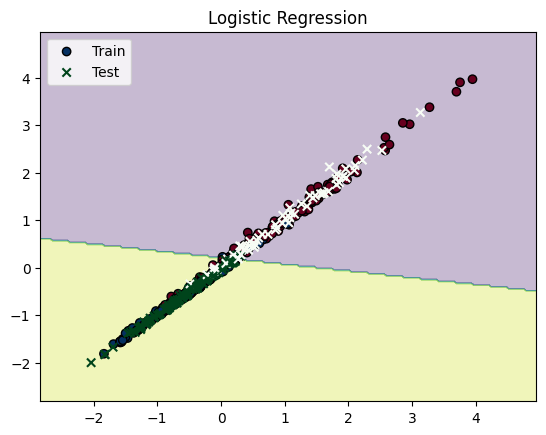

In [36]:
# Create a meshgrid
x1_min, x1_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
x2_min, x2_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                     np.linspace(x2_min, x2_max, 200))

# Predict over grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = lg.predict(grid)
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap="RdBu", label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', cmap="Greens", label="Test")
plt.title("Logistic Regression")
plt.legend()
plt.show()